In [1]:
# Program służy do zliczania statystyk użytkowników serwisu skracającego linki bit.ly

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#import bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas import DataFrame, Series

In [4]:
#wczytanie pliku 
path = 'usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path)]

In [5]:
#wyświetlenie zawartości pliku
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [6]:
#pierwsze 10 stref czasowych
frame = DataFrame(records)
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [7]:
#zliczenie stref czasowych i wyświetlenie najbardziej popularnych
tz_counts = frame['tz'].value_counts()
tz_counts[:15]

America/New_York        1251
                         521
America/Chicago          400
America/Los_Angeles      382
America/Denver           191
Europe/London             74
Asia/Tokyo                37
Pacific/Honolulu          36
Europe/Madrid             35
America/Sao_Paulo         33
Europe/Berlin             28
Europe/Rome               27
America/Rainy_River       25
Europe/Amsterdam          22
America/Indianapolis      20
Name: tz, dtype: int64

In [8]:
#czyszczenie nieistnejących wartości (nie wszystkie wpisy mają strefę czasową)
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:3]

America/New_York    1251
Unknown              521
America/Chicago      400
Name: tz, dtype: int64

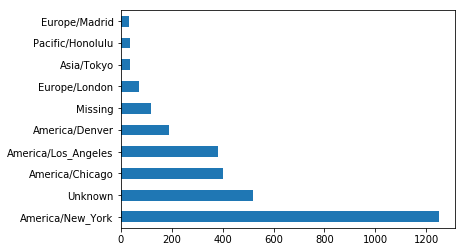

In [9]:
#Wykres najbardziej popularnych stref czasowych
tz_counts[:10].plot(kind='barh')

In [10]:
#Statystyka przeglądarek użytkowników
results = Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [11]:
#Top 10 przeglądarek
results.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
BlackBerry8520/5.0.0.592       3
Dalvik/1.4.0                   3
dtype: int64

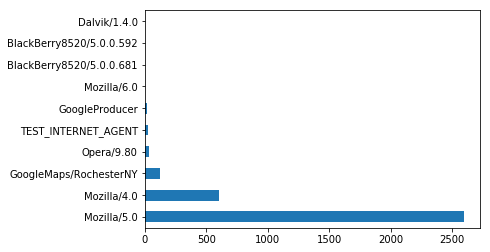

In [12]:
#Wykres przeglądarek
results.value_counts()[:10].plot(kind='barh', rot=0)